Dear Participant,

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

Use the provided dataset in order to do your analysis.

#Attribute Information:

#Matrix column entries (attributes):
#name - ASCII subject name and recording number
#MDVP:Fo(Hz) - Average vocal fundamental frequency
#MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
#MDVP:Flo(Hz) - Minimum vocal fundamental frequency
#MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
#measures of variation in fundamental frequency
#MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
#NHR,HNR - Two measures of ratio of noise to tonal components in the voice
#status - Health status of the subject (one) - Parkinson's, (zero) - healthy
#RPDE,D2 - Two nonlinear dynamical complexity measures
#DFA - Signal fractal scaling exponent
#spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [2]:
# Import required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# type your code here
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# resample the dataset
from sklearn.utils import resample
from sklearn.utils import shuffle

# import various functions from sklearn 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# import the XGBoost function for classification
from xgboost import XGBClassifier
# import the XGBoost function for classification
from xgboost import XGBClassifier
import statsmodels.api as sm
import random

In [18]:
plt.rcParams['figure.figsize'] = [15,8]

### Q1. Load the dataset 

In [10]:
df=pd.read_csv("parkinsons.csv")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,0.043740,0.426000,0.021820,0.031300,0.029710,0.065450,0.022110,21.033000,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,0.061340,0.626000,0.031340,0.045180,0.043680,0.094030,0.019290,19.085000,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,0.052330,0.482000,0.027570,0.038580,0.035900,0.082700,0.013090,20.651000,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,0.054920,0.517000,0.029240,0.040050,0.037720,0.087710,0.013530,20.644000,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,0.064250,0.584000,0.034900,0.048250,0.044650,0.104700,0.017670,19.649000,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [12]:
df=df.set_index("name")
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,0.043740,0.426000,0.021820,0.031300,0.029710,0.065450,0.022110,21.033000,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,0.061340,0.626000,0.031340,0.045180,0.043680,0.094030,0.019290,19.085000,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,0.052330,0.482000,0.027570,0.038580,0.035900,0.082700,0.013090,20.651000,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,0.054920,0.517000,0.029240,0.040050,0.037720,0.087710,0.013530,20.644000,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,0.064250,0.584000,0.034900,0.048250,0.044650,0.104700,0.017670,19.649000,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Q2. Use the .describe() method on the dataset and state any insights you may come across.

In [6]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### Q3. Check for class imbalance. Do people with Parkinson's have greater representation in the dataset?

In [37]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

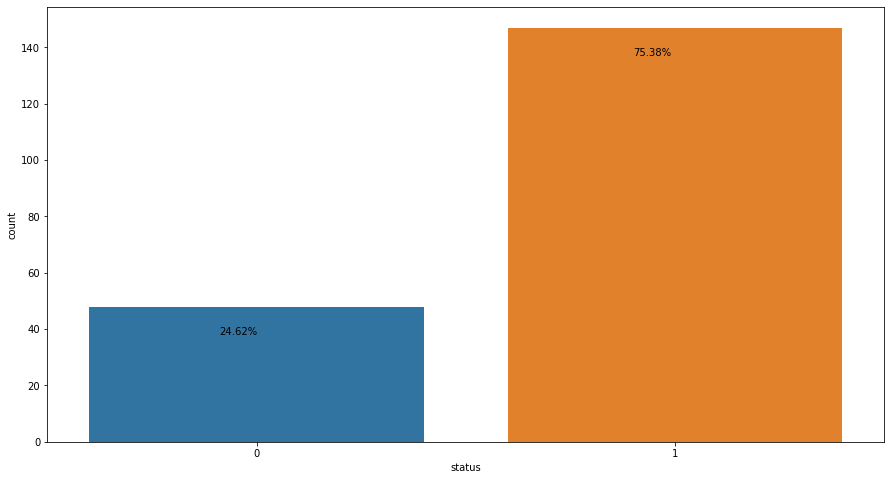

In [38]:
sns.countplot(df['status'])
plt.text(x = -0.09, y = df['status'].value_counts()[0] - 10, s = str(round((df['status'].value_counts()[0])*100/len(df['status']),2)) + '%')
plt.text(x = 0.90, y = df['status'].value_counts()[1] - 10,s = str(round((df['status'].value_counts()[1])*100/len(df['status']),2)) + '%')
plt.show()

### Q4. Check for missing vaues and take necessary measures by dropping observation or imputing them.

In [7]:
df.isnull().sum()/len(df)*100

name               0.000000
MDVP:Fo(Hz)        0.000000
MDVP:Fhi(Hz)       0.000000
MDVP:Flo(Hz)       0.000000
MDVP:Jitter(%)     0.000000
MDVP:Jitter(Abs)   0.000000
MDVP:RAP           0.000000
MDVP:PPQ           0.000000
Jitter:DDP         0.000000
MDVP:Shimmer       0.000000
MDVP:Shimmer(dB)   0.000000
Shimmer:APQ3       0.000000
Shimmer:APQ5       0.000000
MDVP:APQ           0.000000
Shimmer:DDA        0.000000
NHR                0.000000
HNR                0.000000
status             0.000000
RPDE               0.000000
DFA                0.000000
spread1            0.000000
spread2            0.000000
D2                 0.000000
PPE                0.000000
dtype: float64

In [36]:
# no null value present in dataset

### Q5. Plot the distribution of all the features. State any observations you can make based on the distribution plots.

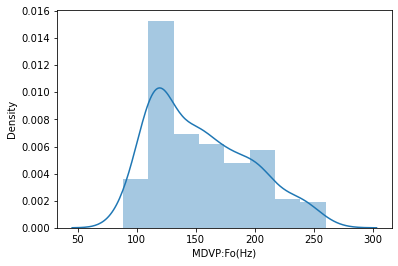

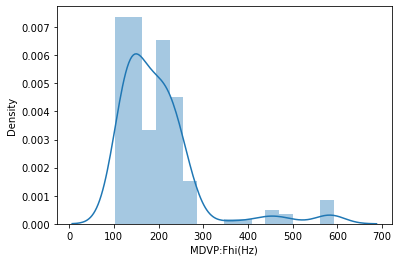

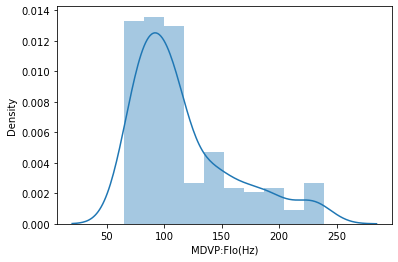

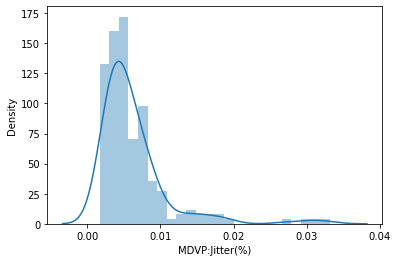

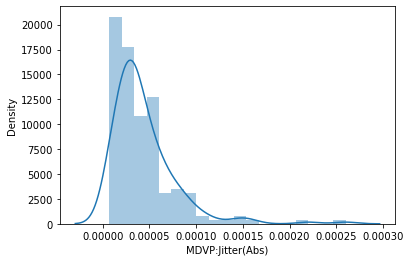

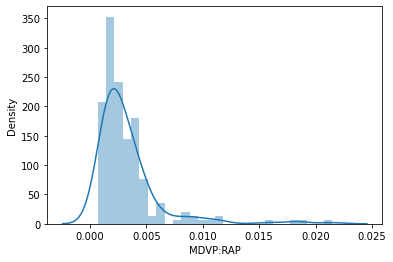

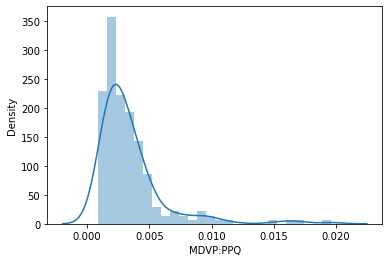

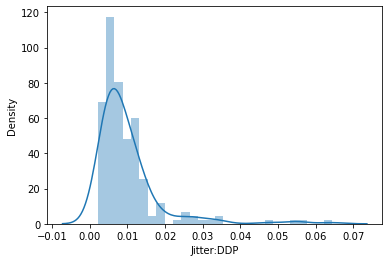

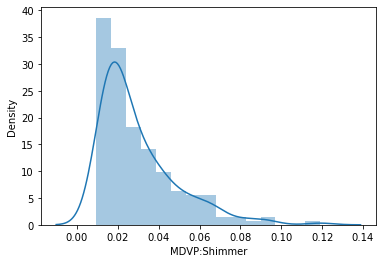

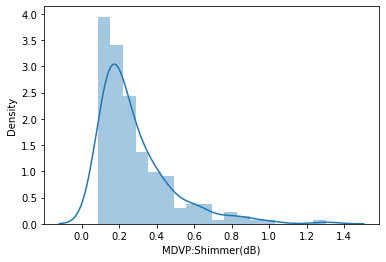

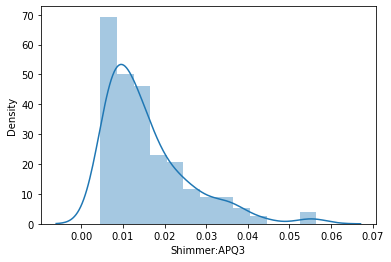

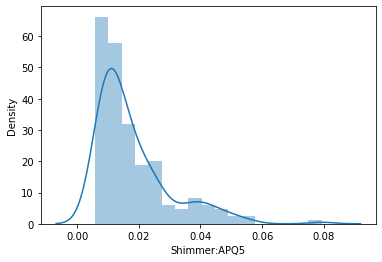

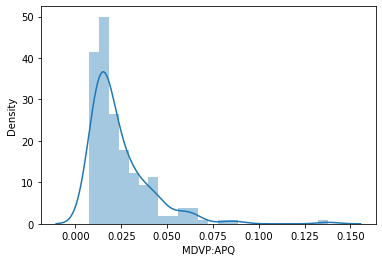

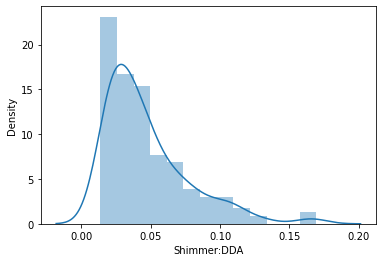

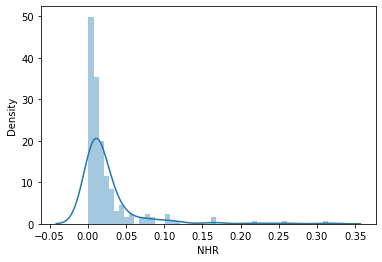

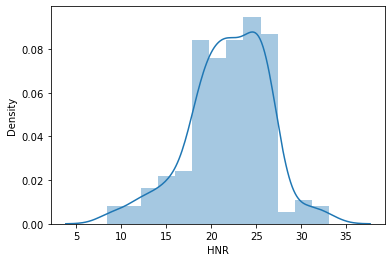

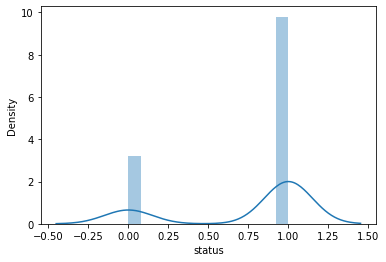

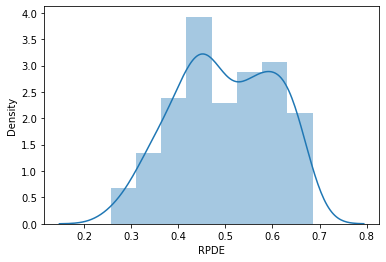

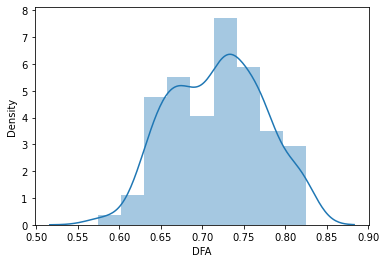

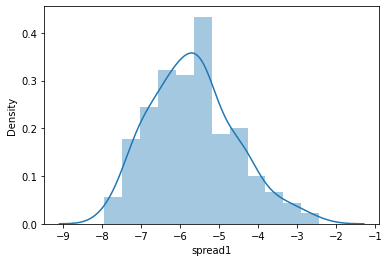

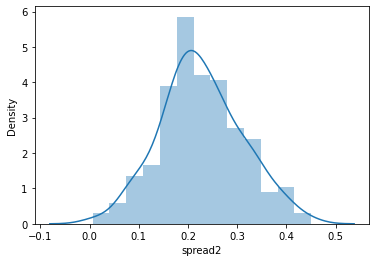

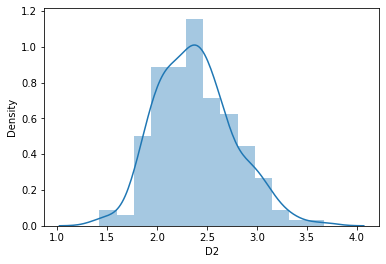

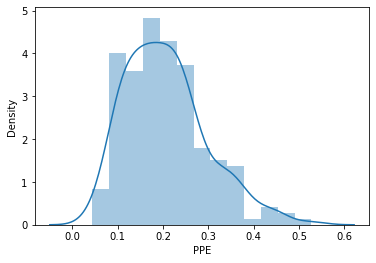

In [13]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

In [14]:
# All the variable are skewed.

### Q6. Check for outliers in the data. Are there any variables with high amount of outliers.

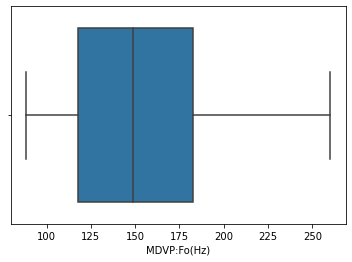

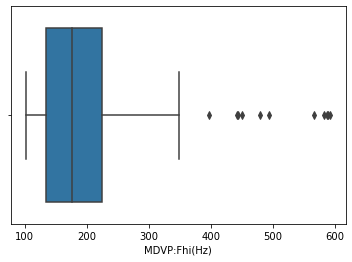

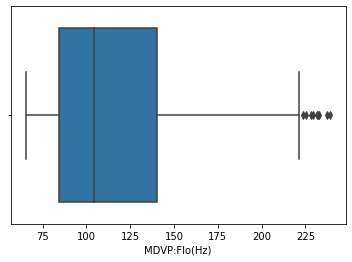

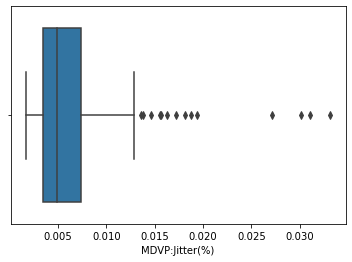

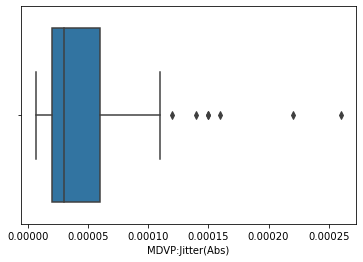

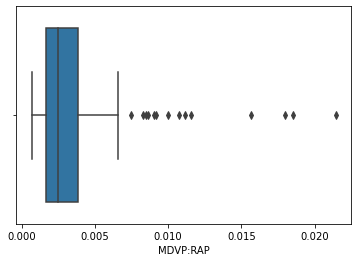

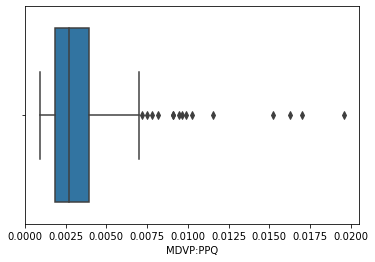

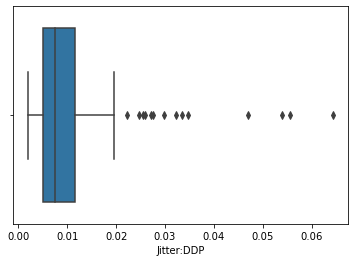

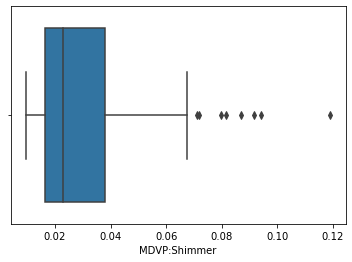

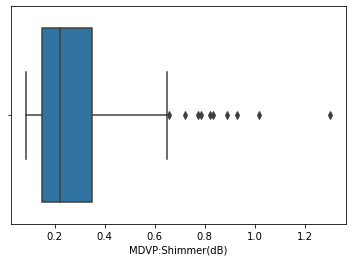

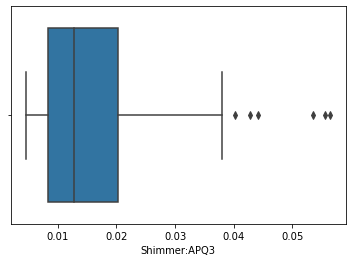

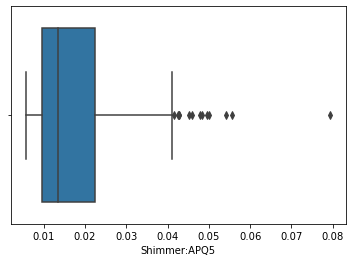

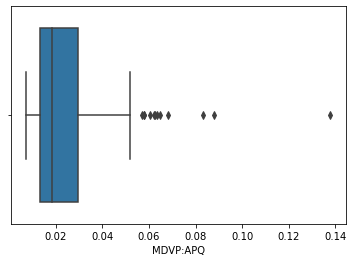

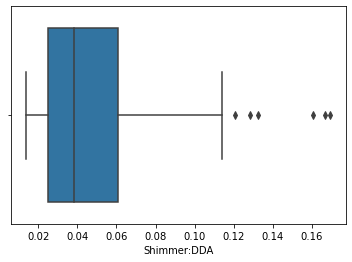

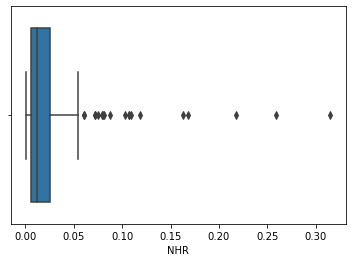

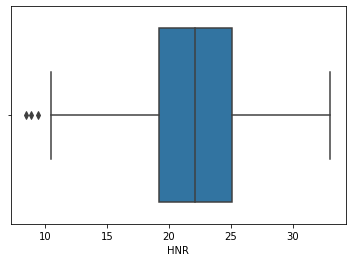

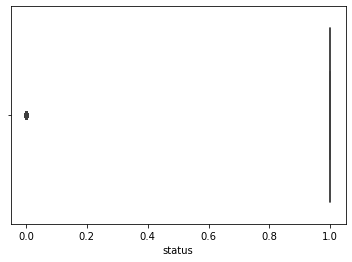

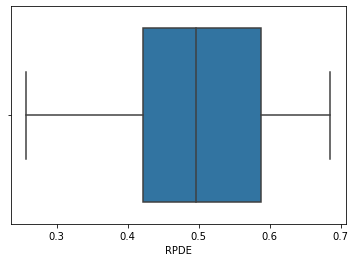

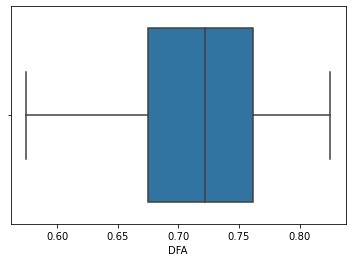

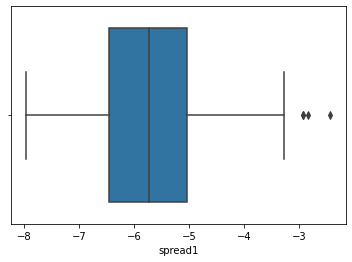

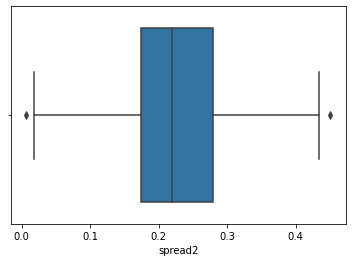

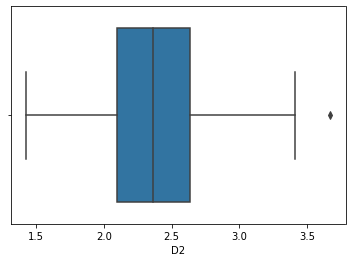

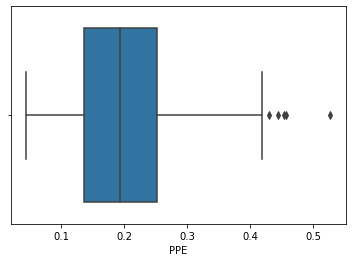

In [15]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [39]:
Q1 = df.quantile(0.25)

#calculate the third quartile
Q3 = df.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

# remove the outliers from the dataframe
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# reset the row index
df = df.reset_index(drop=True)

# check the shape of the data
df.shape

(114, 23)

In [35]:
# There are lot of variable those have high amount of outliers.
# MDVPFhi(Hz),MDVPFlo(Hz),MDVP.jitter(%),MDVP.jitter(Avs),MDVP.RAP,MDVP.PRO,jitter.DDP,MDVP.Shimmer,....,etc.
# Except RPDE, DFA,MDVP.Fo(Hz) all variable has high amount of outliers.

### Q7. Are there any strong correlations among the independent features?

<AxesSubplot:>

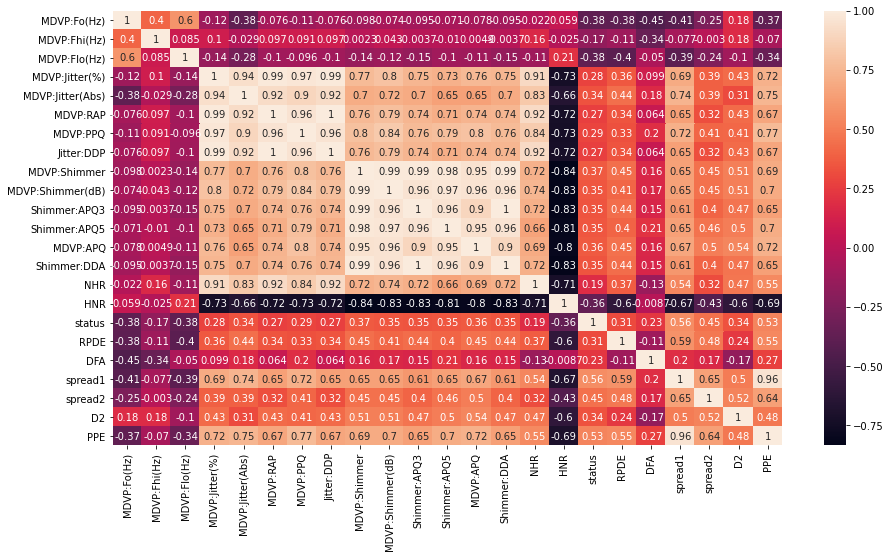

In [19]:
sns.heatmap(df.corr(),annot=True)

### Q8. Split dataset into training & test dataset  

In [21]:
x=df.drop(["status"],axis=1)
y=df["status"]
X=sm.add_constant(x)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.2)

In [22]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (156, 23)
y_train (156,)
X_test (39, 23)
y_test (39,)


### Q9. Create a default decision tree model using criterion = Entropy 

In [24]:

def get_train_report(model):
    train_pred = model.predict(X_train)
    return(classification_report(y_train, train_pred))
def get_test_report(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test, test_pred))

In [25]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree = decision_tree_classification.fit(X_train, y_train)

In [26]:
train_report = get_train_report(decision_tree)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00       119

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



In [27]:
test_report = get_test_report(decision_tree)
print(test_report)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.96      0.96      0.96        28

    accuracy                           0.95        39
   macro avg       0.94      0.94      0.94        39
weighted avg       0.95      0.95      0.95        39



### Q10.  Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? 

In [29]:
tuned_paramaters = [{'criterion': ['entropy'], 
                     'max_depth': range(2, 10),
                     'min_samples_leaf': range(1,10)}]
decision_tree_classification = DecisionTreeClassifier(random_state = 10)
tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)
tree_grid_model = tree_grid.fit(X_train, y_train)
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 5} 



In [30]:
dt_model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  random_state = 10)
dt_model = dt_model.fit(X_train, y_train)

In [32]:
train_report = get_train_report(dt_model)
print(train_report)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        37
           1       0.97      0.97      0.97       119

    accuracy                           0.96       156
   macro avg       0.95      0.95      0.95       156
weighted avg       0.96      0.96      0.96       156



In [33]:
# Interpretation: The accuracy of the test dataset increased by 1 after tuning of the hyperparameters.

### Q11. Implement a Random Forest model. What is the optimal number of trees that gives the best result?

In [34]:

tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
random_forest_classification = RandomForestClassifier(random_state = 10)
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)
rf_grid_model = rf_grid.fit(X_train, y_train)
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50} 

